# Starbuck Promotion Campaign 
## Limit that promotion only to those that are most receptive to the promotion.
data source:
https://github.com/joshxinjie/Data_Scientist_Nanodegree/tree/master/starbucks_portfolio_exercise?source=post_page---------------------------

In [1]:
import pandas as pd
trainf = 'Starbucks_1.csv'
predf = 'Starbucks_2.csv'
df = pd.read_csv(trainf) # data for train and validate
dfp = pd.read_csv(predf) # data for predict 

## we need the data ready,with Promotion and Purchase as binary variable
After compeleting test promotion campaign, the next step is analyzing the result with Uplift model using Pylift, and then using the model to predict which customer you should target with the promotion.  

each row is a customer records
50% of the people received promotion
and we kept track of if they purchsed or not

In [2]:
df['Promotion'].value_counts() 

No     20902
Yes    20748
Name: Promotion, dtype: int64

In [3]:
df.loc[df['Promotion'] == 'Yes', 'Promotion'] = 1
df.loc[df['Promotion'] == 'No', 'Promotion'] = 0
del df['ID']
df.head()

,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,0,0,1,41.376390,1.172517,1,1,2,2
1,1,0,1,25.163598,0.653050,2,2,2,2
2,1,0,1,26.553778,-1.597972,2,3,4,2
3,0,0,2,28.529691,-1.078506,2,3,2,2
4,0,0,2,32.378538,0.479895,2,2,1,2


## now let's train the model

In [4]:
from pylift.generate_data import dgp
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome

In [26]:
up = TransformedOutcome(df, col_treatment='Promotion', col_outcome='purchase')

In [27]:
up.randomized_search(n_iter=20) # automated hyperparameter tunning !

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937 
[21:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937, score=-0.018484658659271767, total=   2.9s
[CV] colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937 
[21:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937, score=-0.0039053664151981215, total=   2.9s
[CV] colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937 
[21:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV]  colsample_bytree=0.9276875558147806, gamma=7.729605241847697, max_depth=9, min_child_weight=93, n_estimators=118, subsample=0.988096446857937, score=0.04550110245316326, total=   3.0s
[CV] colsample_bytree=0.9685316335826992, gamma=2.378041390625639, max_depth=11, min_child_weight=233, n_estimators=117, subsample=0.4812829098421847 
[21:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.9685316335826992, gamma=2.378041390625639, max_depth=11, min_child_weight=233, n_estimators=117, subsample=0.4812829098421847, score=-0.018484658659271767, total=   2.2s
[CV] colsample_bytree=0.9685316335826992, gamma=2.378041390625639, max_depth=11, min_child_weight=233, n_estimators=117, subsample=0.4812829098421847 
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.9685316335826992, gamma=2.378041390625639, max_depth=11,

[CV]  colsample_bytree=0.35230084613082235, gamma=7.554922864847971, max_depth=16, min_child_weight=330, n_estimators=315, subsample=0.5373758041073964, score=0.04550110245316326, total=   3.0s
[CV] colsample_bytree=0.9176342878646893, gamma=1.7149259632572134, max_depth=11, min_child_weight=74, n_estimators=240, subsample=0.9406444325716405 
[21:42:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.9176342878646893, gamma=1.7149259632572134, max_depth=11, min_child_weight=74, n_estimators=240, subsample=0.9406444325716405, score=0.16969816812005203, total=   7.0s
[CV] colsample_bytree=0.9176342878646893, gamma=1.7149259632572134, max_depth=11, min_child_weight=74, n_estimators=240, subsample=0.9406444325716405 
[21:43:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.9176342878646893, gamma=1.7149259632572134, max_depth=

[CV]  colsample_bytree=0.8897103475036827, gamma=3.0225505005653277, max_depth=7, min_child_weight=483, n_estimators=325, subsample=0.33674662114740833, score=0.04550110245316326, total=   3.8s
[CV] colsample_bytree=0.5969482215246772, gamma=0.37408669915787285, max_depth=6, min_child_weight=166, n_estimators=228, subsample=0.8081592056982945 
[21:44:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.5969482215246772, gamma=0.37408669915787285, max_depth=6, min_child_weight=166, n_estimators=228, subsample=0.8081592056982945, score=0.16543484750702223, total=   2.7s
[CV] colsample_bytree=0.5969482215246772, gamma=0.37408669915787285, max_depth=6, min_child_weight=166, n_estimators=228, subsample=0.8081592056982945 
[21:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.5969482215246772, gamma=0.37408669915787285, max_de

[CV]  colsample_bytree=0.5002052109605987, gamma=5.006888216901041, max_depth=2, min_child_weight=356, n_estimators=429, subsample=0.6511786357518112, score=0.04550110245316326, total=   2.5s
[CV] colsample_bytree=0.8167070737242113, gamma=0.18562476424159424, max_depth=16, min_child_weight=90, n_estimators=446, subsample=0.8456987238088998 
[21:45:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.8167070737242113, gamma=0.18562476424159424, max_depth=16, min_child_weight=90, n_estimators=446, subsample=0.8456987238088998, score=0.050499845848716064, total=  13.1s
[CV] colsample_bytree=0.8167070737242113, gamma=0.18562476424159424, max_depth=16, min_child_weight=90, n_estimators=446, subsample=0.8456987238088998 
[21:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.8167070737242113, gamma=0.18562476424159424, max_dep

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': range(10, 500), 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, ...2b633240>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2b4164a

In [28]:
up.fit(**up.rand_search_.best_params_) 

[21:45:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


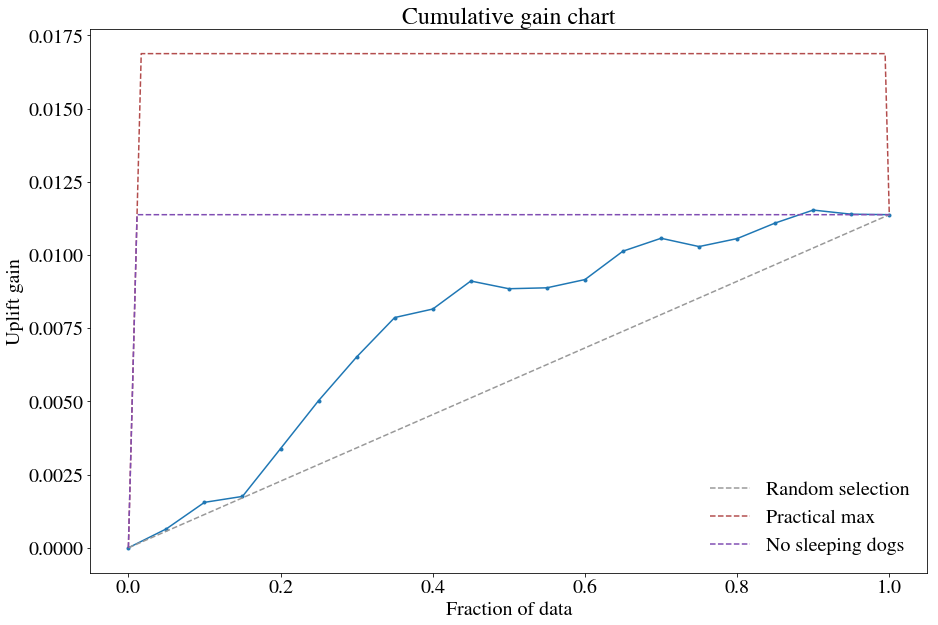

In [29]:
up.plot(plot_type='cgains', show_practical_max=True, show_no_dogs=True) 

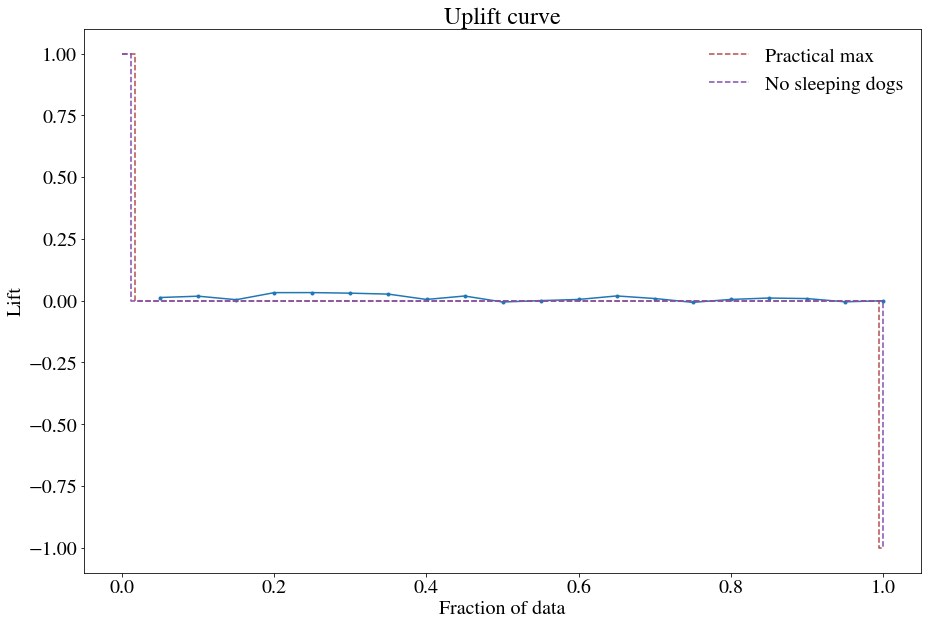

In [30]:
up.plot(plot_type='uplift', show_practical_max=True, show_no_dogs=True) 

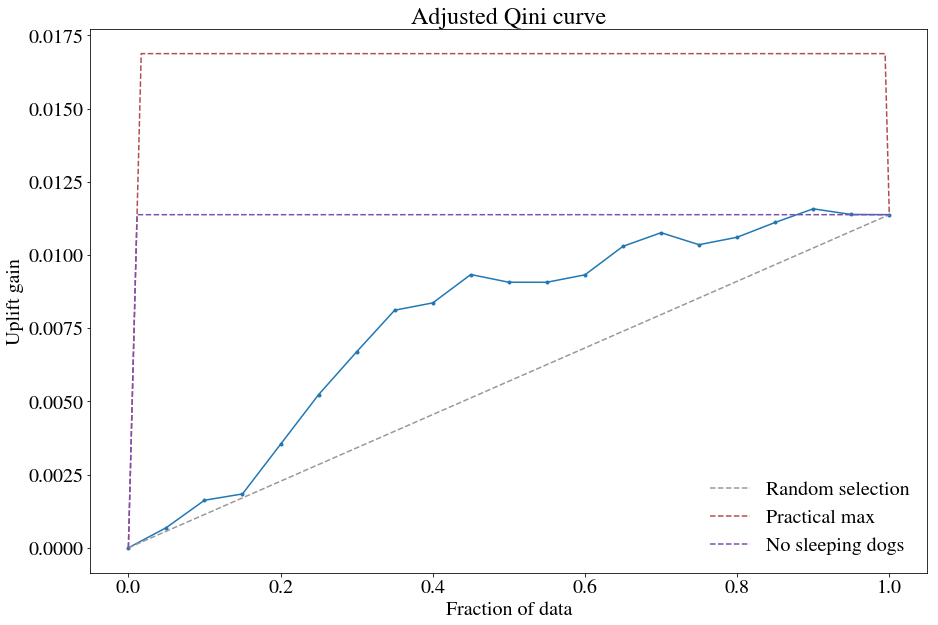

In [31]:
up.plot(plot_type='aqini', show_practical_max=True, show_no_dogs=True) 

# Use Qini curve for evaluate and select the best uplift model.
Now it is time to implement the promotion campaign by only targeting those who are persuadable
You need to feed the model with the whole population you are about to target
This model can help you.predict the probability of each customer converting into purchase if shown promotion
and then you can make the judgement call - to chose what percentage of customer you want to target considering your marketing budget 

In [32]:
import copy
newdf = copy.deepcopy(dfp)
del newdf['ID']
del newdf['Promotion']
del newdf['purchase']
newdf.head()

,V1,V2,V3,V4,V5,V6,V7
0,2,30.443518,-1.165083,1,1,3,2
1,3,32.159350,-0.645617,2,3,2,2
2,2,30.431659,0.133583,1,1,4,2
3,0,26.588914,-0.212728,2,1,4,2
4,3,28.044332,-0.385883,1,1,2,2


In [33]:
result = pd.DataFrame(up.model.predict(newdf))

In [34]:
result.describe()

,0
count,84534.000000
mean,0.009126
std,0.012019
min,-0.028330
25%,0.000650
50%,0.008666
75%,0.016873
max,0.060713


In [36]:
result.quantile([.001, .10, .50, .95], axis = 0) 

,0
0.001,-0.021823
0.100,-0.006006
0.500,0.008666
0.950,0.029356


In [37]:
# all the predicted uplift score, according to QINI Curve, you should target only the top 65% in this case 
#if you don't have budget constraint
sufficient amount
result.sort_values(by = 0, ascending = False)

,0
48980,0.060713
28819,0.059885
48365,0.059586
44147,0.058959
81420,0.058837
24152,0.058740
44489,0.058625
26627,0.058403
29148,0.058313
53703,0.057984
